In [1]:
from SyMBac.drawing import raster_cell
import matplotlib.pyplot as plt
import numpy as np

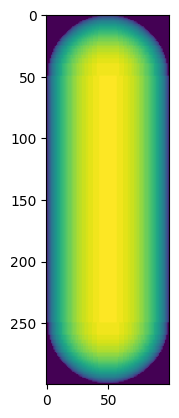

In [2]:
a_cell = raster_cell(300,100, separation = 0)
plt.imshow(
    a_cell
)

In [3]:
from noise import pnoise2

# Parameters for Perlin noise
scale = 10.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 42

def generate_perlin_noise(shape, scale, octaves, persistence, lacunarity, seed):
    noise = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            noise[i][j] = pnoise2((i-shape[0])/2 / scale,
                                  (j-shape[1])/2 / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=shape[0],
                                  repeaty=shape[1],
                                  base=seed)
    return noise

In [4]:
scale = 100.0
octaves = 3
persistence = 0.5
lacunarity = 1
#seed = 42
cells = []
for i in range(25):
    seed = np.random.randint(0,1000000)
    initial_shape = (300, 100)
    initial_texture = generate_perlin_noise(initial_shape, scale, octaves, persistence, lacunarity, seed)
    cells.append(a_cell * (1-initial_texture*0.5))
    #plt.imshow(a_cell * (1+initial_texture))

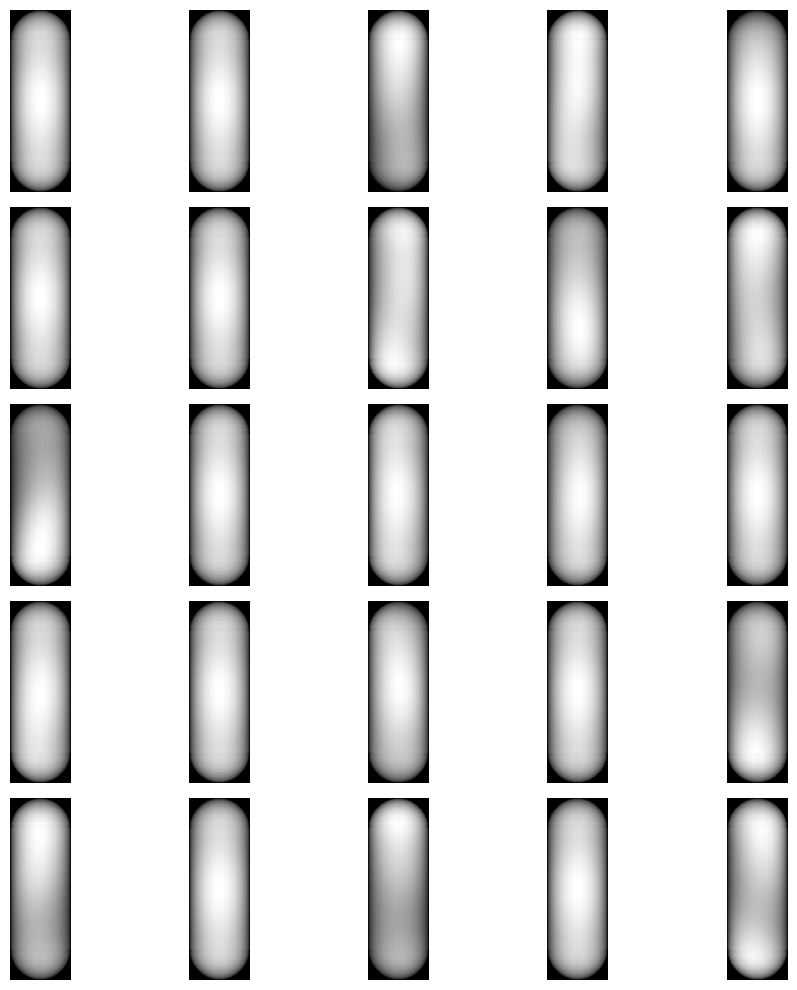

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for ax, img in zip(axes.flatten(), cells):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [111]:
help(pnoise2)

Help on built-in function noise2 in module noise._perlin:

noise2(...)
    noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)

    2 dimensional perlin improved noise function (see noise3 for more info)



In [162]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
import ipywidgets as widgets
from ipywidgets import interact

# Parameters for Perlin noise
scale = 70.0
octaves = 3
persistence = 0.5
lacunarity = 1
seed = 420
seed = 420

def generate_noise(cell_length):
    a_cell = raster_cell(cell_length,100, separation = 0)
    if cell_length > 500:
        seps = np.linspace(0,100,501)
        a_cell = raster_cell(cell_length,100, separation = seps[cell_length-500])
    
    y_pad = 1000-int(cell_length)
    #a_cell = np.pad(a_cell, ((y_pad,0),(0,0)))
    noise = np.zeros(a_cell.shape)
    
    coord = cell_length/2
    for i in range(a_cell.shape[0]):
        for j in range(a_cell.shape[1]):
            noise[i][j] = pnoise2((i - a_cell.shape[0] + coord) / 2 / scale,
                                  (j - a_cell.shape[1]) / 2 / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  base=seed)
    plt.figure(figsize=(7,7))
    print(coord)
    plt.imshow(a_cell * (1+noise*1.5), cmap='gray', vmin=0, vmax = 70)
    #plt.scatter(50, cell_length, c = "r")
    plt.axis('off')
    plt.show()
    plt.close()

# Create interactive sliders for shift_y and shift_x
cell_length_slider = widgets.IntSlider(min=100, max=1000, step=1, value=500, description='cell_length')

interact(generate_noise, cell_length=cell_length_slider)

interactive(children=(IntSlider(value=500, description='cell_length', max=1000, min=100), Output()), _dom_clas…

<function __main__.generate_noise(cell_length)>

In [180]:
175/500

0.35

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
import ipywidgets as widgets
from ipywidgets import interact

# Parameters for Perlin noise
shape = (300, 100)
scale = 70.0
octaves = 3
persistence = 0.5
lacunarity = 1
seed = 420

def generate_noise(cell_length):
    a_cell = raster_cell(cell_length,100, separation = 0)
    #if cell_length > 500:
    #    seps = np.linspace(0,100,501)
    #    a_cell = raster_cell(500,100, separation = seps[cell_length-500])
    prev_coord = 500
    correction = (250-cell_length/2)
    coord = prev_coord - cell_length*0. + correction
    y_pad = 1000-int(cell_length)
    #a_cell = np.pad(a_cell, ((y_pad,0),(0,0)))
    noise = np.zeros(a_cell.shape)
    for i in range(a_cell.shape[0]):
        for j in range(a_cell.shape[1]):
            noise[i][j] = pnoise2((i - a_cell.shape[0] + coord) / 2 / scale,
                                  (j - a_cell.shape[1]) / 2 / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  base=seed)
    plt.figure(figsize=(7,7))
    print(coord)
    print(correction)
    plt.imshow(a_cell * (1+noise*1.5), cmap='gray', vmin=0, vmax = 70)
    #plt.scatter(50, cell_length, c = "r")
    plt.axis('off')
    plt.show()
    plt.close()

# Create interactive sliders for shift_y and shift_x
cell_length_slider = widgets.IntSlider(min=100, max=1000, step=1, value=500, description='cell_length')

interact(generate_noise, cell_length=cell_length_slider)

interactive(children=(IntSlider(value=500, description='cell_length', max=1000, min=100), Output()), _dom_clas…

<function __main__.generate_noise(cell_length)>

0


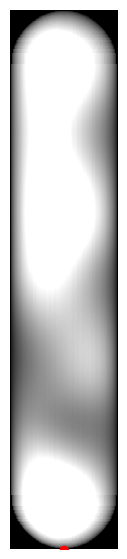

In [131]:
def generate_noise(cell_length):
    a_cell = raster_cell(cell_length,100, separation = 0)
    if cell_length > 500:
        seps = np.linspace(0,100,501)
        a_cell = raster_cell(cell_length,100, separation = seps[cell_length-500])
    
    y_pad = 1000-int(cell_length)
    #a_cell = np.pad(a_cell, ((0,y_pad),(0,0)))
    noise = np.zeros(a_cell.shape)
    for i in range(a_cell.shape[0]):
        for j in range(a_cell.shape[1]):
            noise[i][j] = pnoise2((i - 500) / 2 / scale,
                                  (j - a_cell.shape[1]) / 2 / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=shape[0],
                                  repeaty=shape[1],
                                  base=seed)
    plt.figure(figsize=(7,7))
    print((0))
    plt.scatter(50, cell_length, c = "r")
    plt.imshow(a_cell * (1+noise*1.5), cmap='gray', vmin=0, vmax = 50)
    plt.axis('off')
    plt.show()
    plt.close()

generate_noise(500)

0


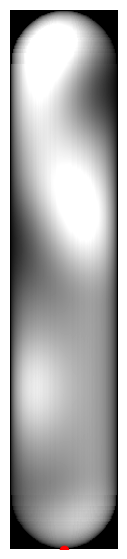

In [134]:
def generate_noise(cell_length):
    a_cell = raster_cell(cell_length,100, separation = 0)
    if cell_length > 500:
        seps = np.linspace(0,100,501)
        a_cell = raster_cell(cell_length,100, separation = seps[cell_length-500])
    
    y_pad = 1000-int(cell_length)
    #a_cell = np.pad(a_cell, ((0,y_pad),(0,0)))
    noise = np.zeros(a_cell.shape)
    for i in range(a_cell.shape[0]):
        for j in range(a_cell.shape[1]):
            noise[i][j] = pnoise2((i - 0) / 2 / scale,
                                  (j - a_cell.shape[1]) / 2 / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=shape[0],
                                  repeaty=shape[1],
                                  base=seed)
    plt.figure(figsize=(7,7))
    print((0))
    plt.scatter(50, cell_length, c = "r")
    plt.imshow(a_cell * (1+noise*1.5), cmap='gray', vmin=0, vmax = 50)
    plt.axis('off')
    plt.show()
    plt.close()

generate_noise(500)